# Chapter 13 PCA

主成分分析（Principle Component Analysis, PCA）是一种降维的方法。降维即将包含多个特征的高维数据转换到新的坐标系中可以用较少特征的低维数据代表。其中新坐标系的选择是由数据本身决定的。第一个坐标系是原始数据中方差最大的方向，第二个坐标系是与第一个坐标系正交的方向，以此类推。这样数据大部分的方差都在最前面的几个新坐标轴上。

## PCA的python实现

PCA工作流程：
- 去除平均值
- 计算协方差矩阵
- 计算协方差矩阵的特征值和特征向量
- 将特征值从大到小排序
- 保留最前面的N个特征向量
- 将数据转换到上述的N个特征向量空间中

```python
def pca(dataMat, topNfeat=9999999):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals #remove mean
    covMat = cov(meanRemoved, rowvar=0)
    eigVals,eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)            #sort, sort goes smallest to largest
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    lowDDataMat = meanRemoved * redEigVects #transform data into new dimensions
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

```


In [1]:
import pca
dataMat = pca.loadDataSet('testSet.txt')
dataMat[0:4,]

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        [ 9.306371,  9.847394]])

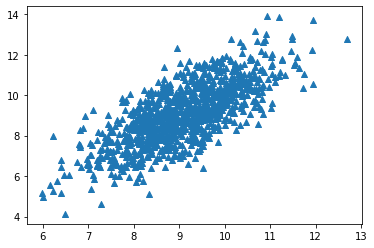

In [2]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^')
plt.show()

In [3]:
lowDMat, reconMat = pca.pca(dataMat, 2)
# 降维后数据
lowDMat[0:4,]

matrix([[-2.51033597,  0.15840394],
        [-2.86915379,  0.5092619 ],
        [ 0.09741085, -0.20728318],
        [-0.76778222,  0.18405066]])

In [4]:
# 原始数据
reconMat[0:4,]

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        [ 9.306371,  9.847394]])

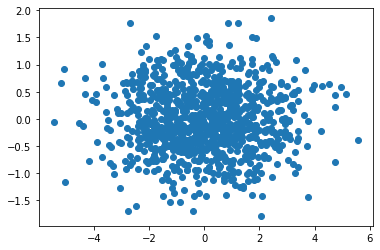

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(lowDMat[:,0].flatten().A[0], lowDMat[:,1].flatten().A[0], marker='o')
plt.show()

# 示例：利用PCA对半导体制造数据降维

数据包含1567个样本点，590个特征

In [6]:
from numpy import *
dataMat2 = pca.replaceNanWithMean()
shape(dataMat2)

(1567, 590)

In [7]:
# rowMeans
meanVals = mean(dataMat2, axis=0)
meanRemoved = dataMat2 - meanVals
# covariance matrix
covMat = cov(meanRemoved, rowvar=0)
# eigenvalue and eigenvector
eigVals, eigVects = linalg.eig(mat(covMat))
eigVals[0:4]

array([53415197.85687515, 21746671.90465923,  8248376.61529074,
        2073880.85929397])

In [8]:
lowDMat2, reconMat2 = pca.pca(dataMat2)
lowDMat2[0:4,0:4]

matrix([[5183.89616507, 3022.64772377, -688.38624272,   57.92893142],
        [1866.69728394, 4021.63902468, 1505.57352582,  199.23992427],
        [3154.74165413, 3461.98581552, 1855.44207771, -153.33360802],
        [1983.43354963,  598.03580369, 1509.10287245, -571.94307328]])

In [9]:
# 计算每个主成分所能解释的方差
pcvar = var(lowDMat2, axis=0)/sum(var(lowDMat2, axis=0))
# 前20主成分
pcvar.flatten().A[0][0:20]

array([0.59254058, 0.24123819, 0.09150014, 0.02300579, 0.01459192,
       0.00518818, 0.00322658, 0.00314677, 0.0026308 , 0.00231307,
       0.00217535, 0.00207282, 0.00169084, 0.00125591, 0.00120353,
       0.00114092, 0.00111115, 0.00092458, 0.00090503, 0.00086145])

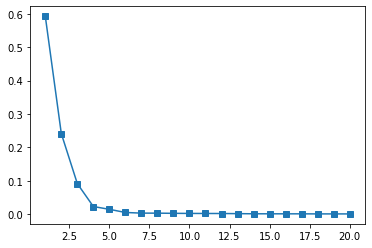

In [10]:
x = arange(1,21)
plt.plot(x, pcvar.flatten().A[0][0:20], 's-')
plt.show()

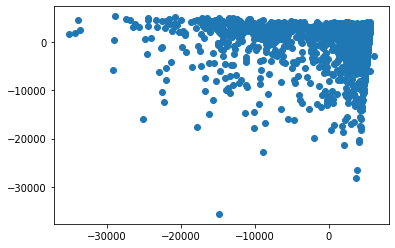

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(lowDMat2[:,0].flatten().A[0], lowDMat2[:,1].flatten().A[0], marker='o')
plt.show()

数据前六个主成分解释了90%以上的方差，这里用前两维作图。可能是由于数据没有scale的原因，降维后的点集中在一个区域。

In [20]:
import pandas as pd
iris = pd.read_csv('iris.data.txt', header=None, names=["Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species"])
print(iris)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width         Species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

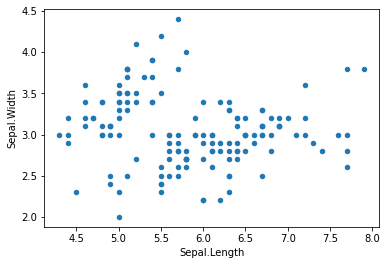

In [23]:
iris.plot.scatter(x='Sepal.Length', y='Sepal.Width')



# 小结

降维的目的：
- 使得数据集更加容易使用
- 降低算法的计算开销
- 去除噪声
- 帮助结果的解读


PCA可以从数据中识别主要特征，是通过沿着数据最大方差方向旋转坐标轴实现的。